Chapter 6
# 可视化色谱在HSV色彩空间位置
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

### 自定义函数

In [6]:
def visualize_cm_in_HSV(cm_name):

    fig = plt.figure(figsize = (6,6))

    azim_array = [38, 0, -90, -90]
    elev_array = [34, 0, 0,  90]
    # 指定三种不同观察三维空间的视角
    
    x = np.linspace(0.0, 1.0, 500)

    rgb = mpl.colormaps[cm_name](x)[np.newaxis, :, :3]
    # 提取色谱 RGB 色号
    
    theta_array = np.linspace(0, 2*np.pi, 100)
    xline = np.sin(theta_array)
    yline = np.cos(theta_array)
    
    HSV = rgb_to_hsv(rgb)
    HSV = HSV[0]
    HSV[:,0] = HSV[:,0] * 2 * np.pi
    HSV_xyz = np.copy(HSV)
    HSV_xyz[:,0] = HSV[:,1] * np.sin(HSV[:,0])
    HSV_xyz[:,1] = HSV[:,1] * np.cos(HSV[:,0])
    # 将圆柱坐标转换为三维直角坐标系坐标

    for idx, angles in enumerate(zip(azim_array, elev_array)):

        ax = fig.add_subplot(2,2,idx+1, projection = '3d')

        ax.plot(xline, yline, theta_array*0 + 0, 'k')
        ax.plot(xline, yline, theta_array*0 + 1, 'k')
        ax.plot((0,0),(0,0),(0,1), color = 'k')
        # 绘制两个单位正圆，z 的高度分别为 0、1
        # 代表 V = 0, V = 1
        # 绘制散点图
        ax.scatter(HSV_xyz[:,0], HSV_xyz[:,1], HSV_xyz[:,2], 
                   c = rgb[0], 
                   s = 10, 
                   alpha = 1)

        ax.set_xlim(-1,1)
        ax.set_ylim(-1,1)
        ax.set_zlim(0,1)
        ax.set_xticks([-1, 1])
        ax.set_yticks([-1, 1])
        ax.set_zticks([0, 1])
        ax.set_zlabel('V')

        # ax.grid()
        plt.rcParams['grid.color'] = "k"
        ax.set_proj_type('ortho')
        ax.set_box_aspect(aspect = (1,1,1))
        ax.view_init(azim=angles[0], elev=angles[1])

    fig.savefig('Figures/HSV_' + cm_name + '.svg', format='svg')
    

### 可视化八个色谱，HSV色彩空间

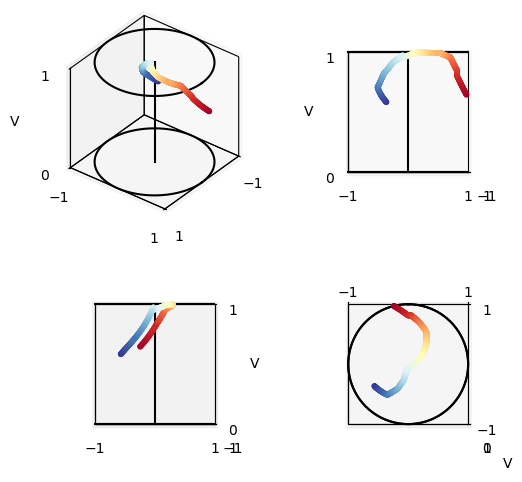

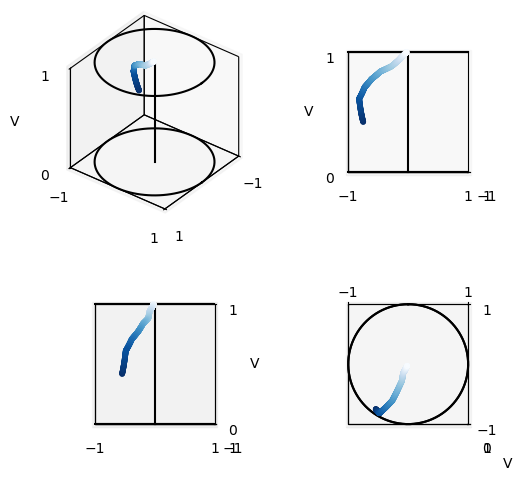

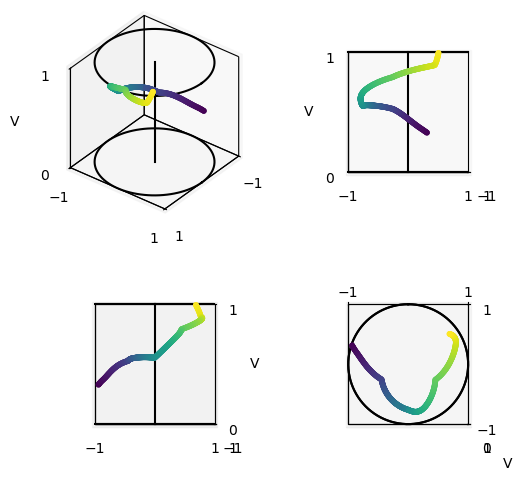

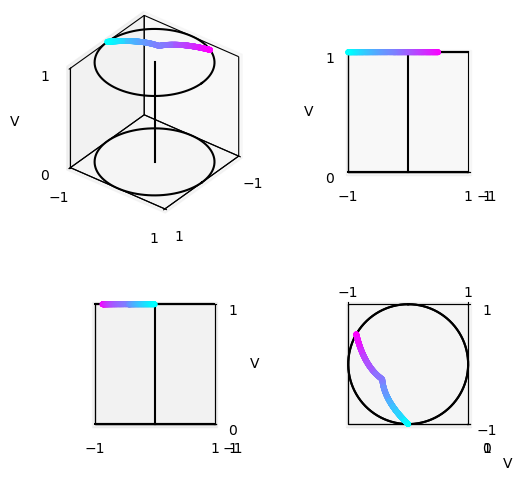

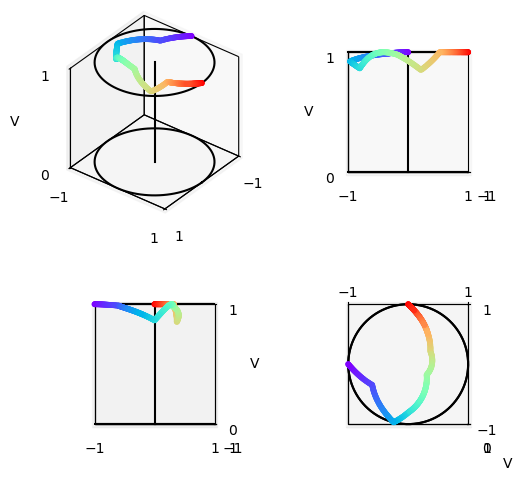

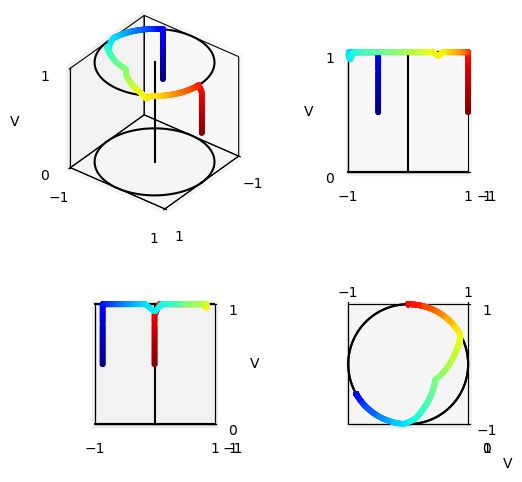

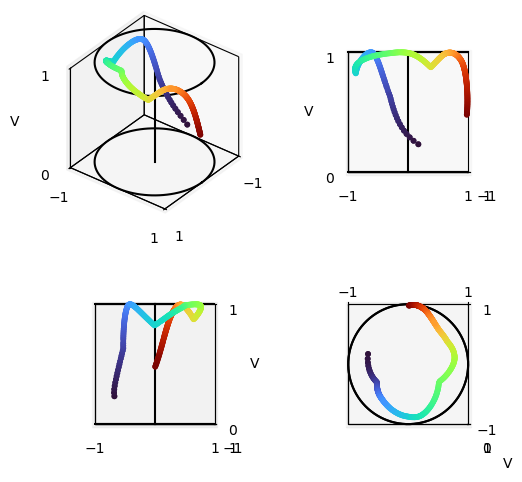

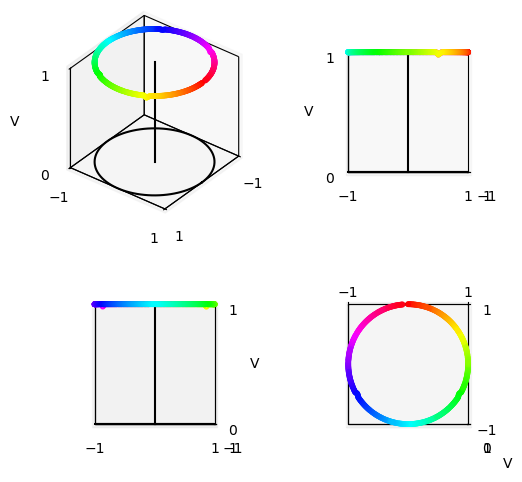

In [7]:
cm_list = ['RdYlBu', 'Blues', 'viridis', 'cool', 'rainbow', 'jet', 'turbo', 'hsv']

for idx, cm_idx in enumerate(cm_list):
    
    visualize_cm_in_HSV(cm_idx)

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023